# <p style ="text-align: center">YouTube's People & Blogs Category</p>

This notebook presents an Exploratory Data Analysis (EDA) of the "People & Blogs" category on YouTube. The goal of this analysis is to gain insights into the trends, patterns, and dynamics within this category over a specified period. We look to understand how getting into this category has historically affected channel growth and popularity. We also look to understand how the category has changed over time and how it compares to other categories.

### About the People & Blogs category

The "People & Blogs" category on YouTube comprises diverse content created by individuals or groups sharing personal experiences, opinions, lifestyle content, vlogs, and commentary. This category serves as a platform for content creators to engage with audiences by showcasing their daily lives, hobbies, thoughts, and perspectives.

Let's dive into the analysis !

# Imports

In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyarrow.ipc as ipc
import pyarrow.feather as feather

from utils.loading import *

In [2]:
NOTEBOOK_PATH = os.getcwd()
DATA_PATH = os.path.join(NOTEBOOK_PATH, "data_youniverse")
CATEGORY = "People & Blogs"

# Data loading

In [4]:
df_channels_en = pd.read_csv(os.path.join(DATA_PATH, "df_channels_en.tsv.gz"), compression="infer", sep="\t") 
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 20s
#df_feather = feather.read_feather(os.path.join(DATA_PATH, 'yt_metadata_helper.feather'))

### Plot Category distribution

Let's start our analysis by looking at the distribution of channels across categories. This will give us a sense of how popular the "People & Blogs" category is relative to other categories.

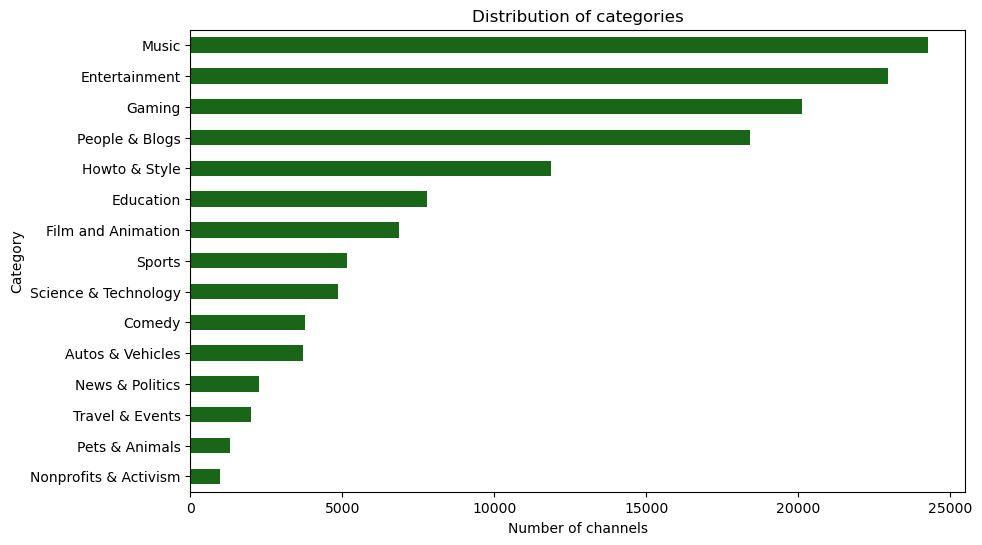

In [45]:
category_value_counts = df_channels_en["category_cc"].value_counts()

# Plot distribution of categories, emphasis on the People & Blogs category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_value_counts.values, y=category_value_counts.index, orient="h", color="g", saturation=0.6, width=0.5)
plt.title("Distribution of categories")
plt.xlabel("Number of channels")
plt.ylabel("Category")
plt.show();

As we can see, the "People & Blogs" category is the 4th most popular category on YouTube. It is only behind the "Entertainment", "Music", and "Gaming" categories. It will therefore be interesting to visit the dynamics within this category and understand how it has changed over time.

### Read People & Blogs channels' data

Let's extract the data for the "People & Blogs" category and look at the first few rows.

In [ ]:
CATEGORY_FILE_NAME = ''.join(CATEGORY.split(" ")).lower()
CATEGORY_FILE_PATH = os.path.join(DATA_PATH, f"df_channels_{CATEGORY_FILE_NAME}.tsv.gz")

In [ ]:
# ONLY RUN THE FIRST TIME, LOAD AFTER

yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(os.path.join(DATA_PATH, "yt_metadata_en.jsonl.gz"), CATEGORY)
yt_metadata_filtered.drop(columns=["categories"], inplace=True)
yt_metadata_filtered.to_csv(CATEGORY_FILE_PATH, index=False, compression="gzip")

In [58]:
df_yt_metadata_filtered = pd.read_csv(CATEGORY_FILE_PATH, compression="infer")
df_yt_metadata_filtered['upload_date'] = pd.to_datetime(df_yt_metadata_filtered['upload_date'])
df_yt_metadata_filtered.head()

,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:35.725333,0.0,LZPh8ky-RP8,175,8.0,"thomas train,thomas toby,thomas salty,thomas p...",2015-11-07,1307.0
1,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.405938,613.0,BDnF-EgqAGw,398,49464.0,"vine,vines,vine compilation,chaotic good",2019-02-05,1142835.0
2,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:30.959894,588.0,wrTIXbQED80,375,32726.0,"vines,vine,vine compilation,neutral good,align...",2019-01-31,819654.0
3,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.467288,1177.0,uyWL0ZWibyU,335,86222.0,"vine,vines,vine compilation,neutral evil",2019-01-22,2159837.0
4,UCzWmWTPCafQRNl9q9Y53AfQ,2019-11-17 05:07:31.948318,673.0,yd7d51AgSso,319,30596.0,NaN,2019-01-15,736707.0


In [59]:
df_yt_metadata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910666 entries, 0 to 6910665
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   channel_id     object        
 1   crawl_date     object        
 2   dislike_count  float64       
 3   display_id     object        
 4   duration       int64         
 5   like_count     float64       
 6   tags           object        
 7   upload_date    datetime64[ns]
 8   view_count     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 474.5+ MB


# Exploratory Data Analysis

Now that we have loaded the data, let's dive into the analysis. We will start by looking at the dynamics within the "People & Blogs" category across the years. 

## Upload date analysis

We first take a look at the proportion of videos uploaded in each year that belong to the "People & Blogs" category. This will give us a sense of how the category's importance has changed over time.

### Plot the proportion of videos uploaded per year coming from People & Blogs category

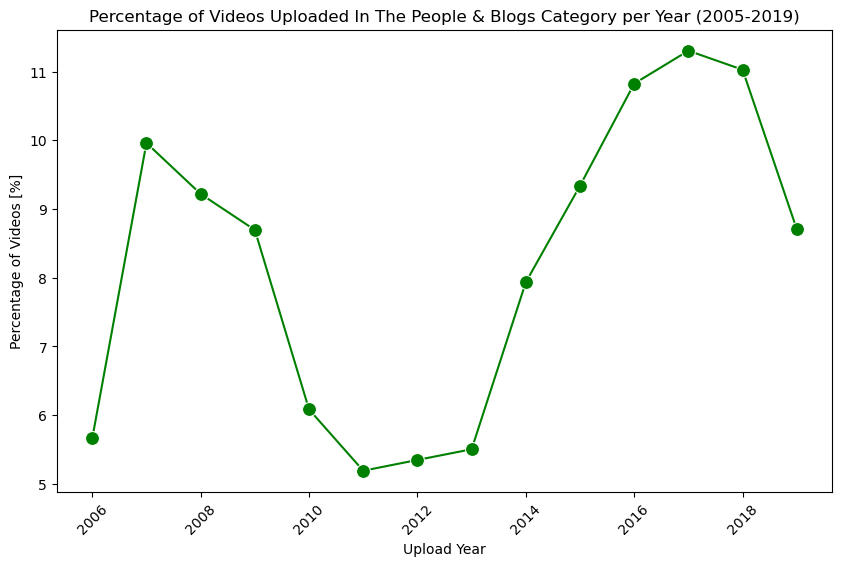

In [60]:
all_cc_yearly_video_count = df_feather["upload_date"].dt.year.value_counts().sort_index()
pb_yearly_video_count = df_feather[df_feather["categories"]==CATEGORY]["upload_date"].dt.year.value_counts().sort_index()

# calculate percentage of videos in People & Blogs category
pb_percentage = pb_yearly_video_count / all_cc_yearly_video_count * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=pb_percentage.index, y=pb_percentage.values, color="g", marker="o", markersize=10)
plt.xticks(rotation=45)
plt.ylabel("Percentage of Videos [%]")
plt.xlabel("Upload Year")
plt.title("Percentage of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show();

We can see that the "People & Blogs" category had a irregular growth in the early years. It then grew rapidly between 2012 and 2017, the year where it peaked. It represented more than 11% of the videos uploaded that year. Since then, the category has been declining in importance. It now represents less than 9% of the videos uploaded in 2019, the last year with recorded data.

These observations align with our intuition. The "People & Blogs" category is a relatively new category on YouTube. It was created in 2006, 1 year after the platform's launch. It has since grown rapidly and has become one of the most popular categories on YouTube. However, it has been declining in importance since 2017, with content creators fluctuating between genres.

The big drop in upload proportion from 2009 to 2013 is likely due to the rise of the "Gaming" category. This category was created much earlier but only started gaining popularity in 2013. It has since become the 3rd most popular category on YouTube.

### Category evolution over time

Having looked at the proportion of videos uploaded per year, let's now take a look at the number of videos uploaded within the category per year. This will give us a sense of how active the category has gotten over time.

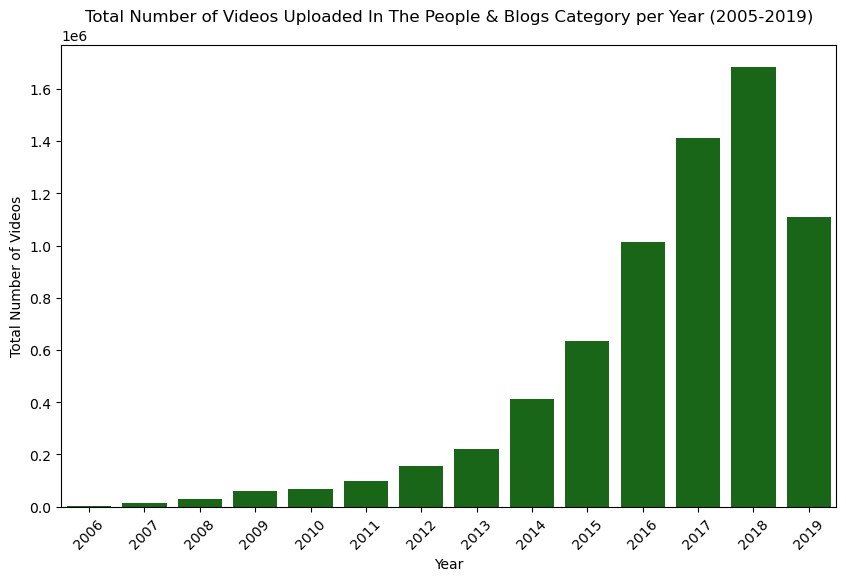

In [49]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=pb_yearly_video_count.index, y=pb_yearly_video_count.values, color="g", saturation=0.6)
plt.xticks(rotation=45)
plt.ylabel("Total Number of Videos")
plt.xlabel("Year")
plt.title("Total Number of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show();

The results look interesting, however we will look at the log scale values to get a better sense of the upload dynamics.

### Apply log scale to the y-axis

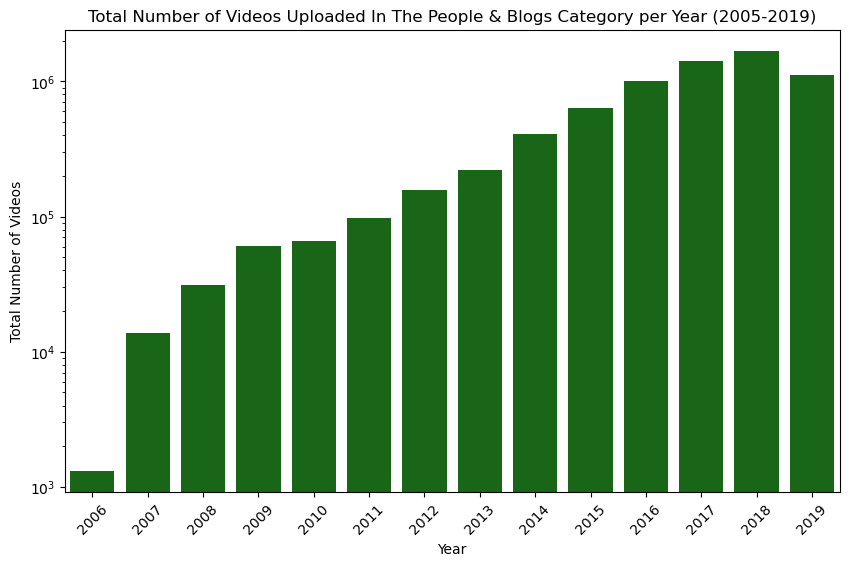

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pb_yearly_video_count.index, y=pb_yearly_video_count.values, color="g", saturation=0.6)
plt.yscale("log")
plt.xticks(rotation=45)
plt.ylabel("Total Number of Videos")
plt.xlabel("Year")
plt.title("Total Number of Videos Uploaded In The People & Blogs Category per Year (2005-2019)")
plt.show();

We can clearly see a rapid growth in the number of videos uploaded within the "People & Blogs" category between 2012 and 2017. This aligns with our previous observation that the category grew rapidly during this period. This growth appears to be linear in log scale, which means that the category was growing exponentially. The last recorded data in 2019 however appear to show a decline in the number of videos uploaded within the category for the first time in that period. This aligns with our previous observation that the category has been declining in importance recently.

## Video duration distribution

We will now explore the distribution of video durations within the "People & Blogs" category. This will give us a sense of the type of content that is being created within the category.

In [ ]:
df_yt_metadata_filtered.sample(5)

In [51]:
df_feather['upload_year'] = df_feather['upload_date'].dt.year

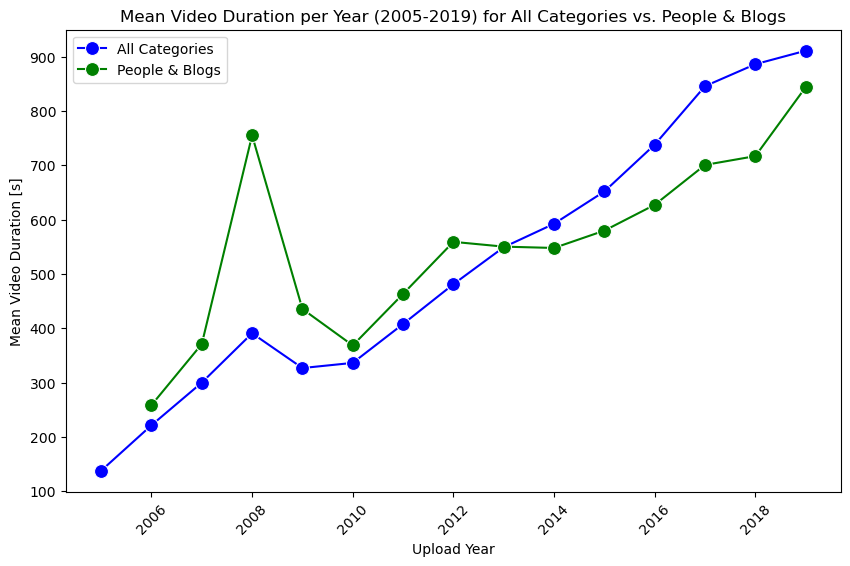

In [52]:
all_cc_mean_video_duration = df_feather.groupby("upload_year")["duration"].mean()
pb_mean_video_duration = df_feather[df_feather["categories"]==CATEGORY].groupby("upload_year")["duration"].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=all_cc_mean_video_duration.index, y=all_cc_mean_video_duration.values, color="b", marker="o", markersize=10, label="All Categories")
sns.lineplot(x=pb_mean_video_duration.index, y=pb_mean_video_duration.values, color="g", marker="o", markersize=10, label="People & Blogs")
plt.xticks(rotation=45)
plt.ylabel("Mean Video Duration [s]")
plt.xlabel("Upload Year")
plt.title("Mean Video Duration per Year (2005-2019) for All Categories vs. People & Blogs")
plt.legend()
plt.show();

We observe that the general trend over the years is that videos on YouTube are getting longer. This is likely due to the fact that YouTube's algorithm favors longer videos. This is because longer videos tend to have higher watch times, which is a key metric for YouTube's algorithm. This is also likely due to the fact that content creators are experimenting with longer formats. 

We also see that the "People & Blogs" category has a similar distribution to the overall distribution. This means that the category follow the general variations in terms of video duration. It has however recently fallen under the overall average for the last 5 years, which again could align with the fact that the category has been declining in popularity recently. 

## Like to dislike ratio analysis

We will continue our analysis by looking at the like to dislike ratio within the "People & Blogs" category. This will give us a sense of how the category is perceived by viewers.

In [53]:
df_feather["like_rate"] = df_feather["like_count"] / (df_feather["like_count"] + df_feather["dislike_count"])

df_feather.sample(5)

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,upload_year,like_rate
28039722,Entertainment,UCWlIGsKGsvgFJHkiZml4O1A,22.0,zEN7L382Jcc,292,298.0,2018-10-05,9570.0,2018,0.931250
36902743,Education,UCPINCItSdAc7SBXxi6AcWpw,4.0,-RGqhJBA4Ac,422,664.0,2019-06-12,14951.0,2019,0.994012
62561661,People & Blogs,UC5bQ6WD_2NLGbfeJYIwAIuA,7.0,uyVEOEcvJ9U,657,78.0,2013-01-15,13972.0,2013,0.917647
33256740,Howto & Style,UCwbEejGsP--6_-jzNVUPCIA,1.0,AbpmQKBL1Dg,262,56.0,2017-08-16,663.0,2017,0.982456
33218550,Pets & Animals,UCwdVL0L9ljq3McWMXWrUVdg,4.0,2Kup3c0KaeA,723,336.0,2015-07-28,11968.0,2015,0.988235


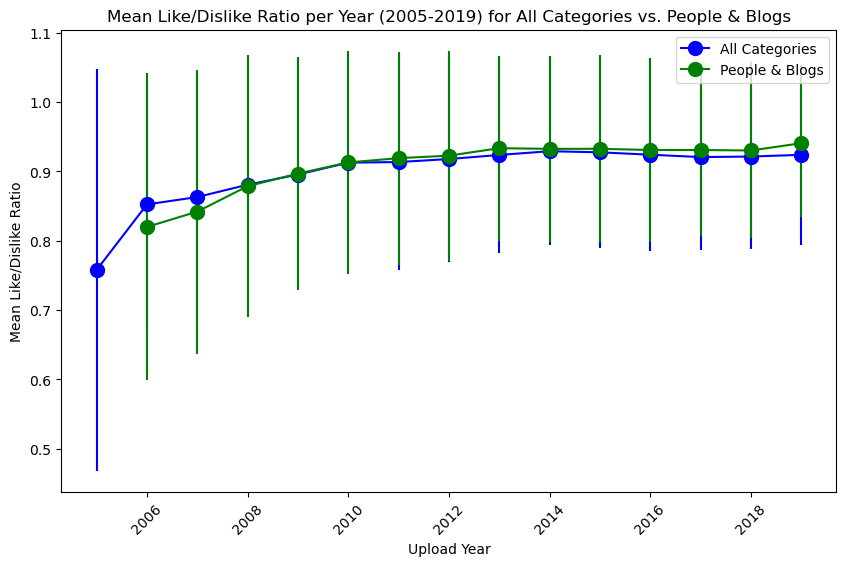

In [54]:
df_non_na_like_rate = df_feather[df_feather["like_rate"].notnull()]

all_cc_mean_like_rate = df_non_na_like_rate.groupby("upload_year")["like_rate"].agg(["mean", "std"])
pb_mean_like_rate = df_non_na_like_rate[df_non_na_like_rate["categories"]==CATEGORY].groupby("upload_year")["like_rate"].agg(["mean", "std"])

plt.figure(figsize=(10, 6))
plt.errorbar(x=all_cc_mean_like_rate.index, y=all_cc_mean_like_rate["mean"], yerr=all_cc_mean_like_rate["std"], color="b", marker="o", markersize=10, label="All Categories")
plt.errorbar(x=pb_mean_like_rate.index, y=pb_mean_like_rate["mean"], yerr=pb_mean_like_rate["std"], color="g", marker="o", markersize=10, label="People & Blogs")
plt.xticks(rotation=45)
plt.ylabel("Mean Like/Dislike Ratio")
plt.xlabel("Upload Year")
plt.title("Mean Like/Dislike Ratio per Year (2005-2019) for All Categories vs. People & Blogs")
plt.legend()
plt.show();

Observing the like to dislike ratio over time, we see that it has held a steady value of around 0.9 for the last 10 years. This means that the category has been consistently well received by viewers. This is likely due to the fact that the category is very diverse and that it is easy for viewers to find content that they enjoy. Most users watching videos within the category are likely to be interested in the particular YouTuber's personnality and content, which explains the high like to dislike ratio.

## Tag Analysis

We now have a general idea of the growth and popularity trends within the category. Another aspect of the data we can explore lies in the video tags. To do so, we will perform a Principal Component Analysis (PCA) on them, which will allow us to reduce the dimensionality of the data and visualize the tags in a 2D space. We will then perform a KMeans clustering on the tags to identify groups of similar tags. The idea is to identify the main topics that are being discussed within the category, which will allow us to define the most popular subcategories within the genre.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# DONT RUN THIS CELL, LOAD INSTEAD

tags = df_yt_metadata_filtered['tags'].str.split(',', expand=True).stack()
tags = tags.str.strip().str.lower()
tags = pd.Series(tags[tags != ''].unique())
# save tags to file
tags.to_csv(os.path.join(DATA_PATH, "tags.tsv.gz"), index=False, compression="gzip")

In [30]:
tags = pd.read_csv(os.path.join(DATA_PATH, "tags.tsv.gz"), compression="infer", header=None, names=["tag"])['tag'].dropna()

In [32]:
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features
tfidf_matrix = vectorizer.fit_transform(tags[:1_000_000])

In [33]:
n_clusters = 10  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(tfidf_matrix)


/Users/hamzezi/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(np.asarray(tfidf_matrix.todense()))

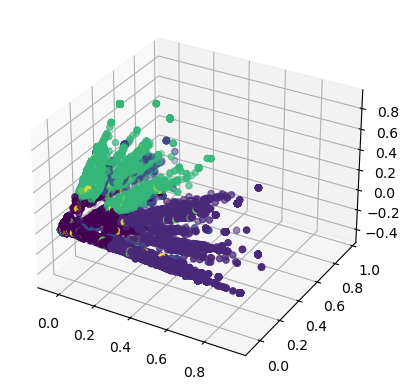

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:,0], reduced_data[:,1], reduced_data[:,2], c=clusters)
plt.show()